# Project 2 COFFEE CHAIN 

---
### Project Introduction
For this project, I am using the data from Tableau Community. The data presented here was collected over a two years period of 2010 and 2011 in United States as part of a study on the coffee chain business of united states. This dataset has three sheets,after the first glance of three sheets,we can see this data has three dimensions: time, product, and location. I merged three sheets into one and do the futher anaysis.
1.Profitbility analysis: 
to find out "weak" products, and popular products
1.1 Sales different type of:
3.Firm’s primary objective is to maximize profits.By using this data, I will try to find out any information which can helps company adjust their strategy and make the company better off.
  1.Product portfolio
      Compare budget data with actual data, find out probelems.For exaple,investigate which kind of product are making the most profit and is there any profit loss product.More specifically,which area is profit loss.......(write more later)
  
---

---
### Part1 :EDA
---

---

### Basic package imports
---

In [118]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [119]:
### The coffee chain excel files contain three sheets
### Sheet1:fact table data; 
### Sheet2:location
### Sheet3:Product description.

## 1. Load the data from file

---
###Load the dataset "Sample_CoffeeChain.xls" 

In [120]:
### First of all,load 3 sheets
xls = pd.ExcelFile('/Users/ChrisH/Desktop/ECON628-01-chrishy2ma/projects/project_2/Sample_CoffeeChain.xls')
Fact= xls.parse('FactTable')
Location= xls.parse('Location')
Product= xls.parse('Product')

## 2. Do an initial overview of the data

---

In [121]:
###read sheet 1 
Fact

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,01/01/2010 00:00:00
1,68,107,190,83,39,27,623,80,80,110,190,970,2,01/01/2010 00:00:00
2,101,139,234,95,38,26,821,110,100,140,240,970,3,01/01/2010 00:00:00
3,30,56,100,44,26,14,623,30,30,50,80,303,13,01/01/2010 00:00:00
4,54,80,134,54,26,15,456,70,60,90,150,303,5,01/01/2010 00:00:00
5,53,108,180,72,55,23,558,80,80,130,210,720,6,01/01/2010 00:00:00
6,99,171,341,170,72,47,1091,110,140,160,300,970,8,01/01/2010 00:00:00
7,0,87,150,63,87,57,435,20,50,80,130,719,9,01/01/2010 00:00:00
8,33,80,140,60,47,19,336,40,50,70,120,970,10,01/01/2010 00:00:00
9,17,72,130,58,55,22,338,20,40,70,110,719,11,01/01/2010 00:00:00


In [122]:
Fact.shape

(4248, 14)

In [123]:
Fact.head(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,01/01/2010 00:00:00
1,68,107,190,83,39,27,623,80,80,110,190,970,2,01/01/2010 00:00:00
2,101,139,234,95,38,26,821,110,100,140,240,970,3,01/01/2010 00:00:00
3,30,56,100,44,26,14,623,30,30,50,80,303,13,01/01/2010 00:00:00
4,54,80,134,54,26,15,456,70,60,90,150,303,5,01/01/2010 00:00:00


In [124]:
Fact.tail(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
4243,19,32,60,24,19,7,567,20,20,30,50,206,4,01/12/2011 00:00:00
4244,34,80,155,65,57,24,403,30,60,80,140,509,5,01/12/2011 00:00:00
4245,76,96,188,80,45,24,1079,60,70,100,170,360,6,01/12/2011 00:00:00
4246,86,104,188,72,46,23,461,80,80,120,200,360,2,01/12/2011 00:00:00
4247,30,145,266,105,125,95,716,50,120,170,290,206,3,01/12/2011 00:00:00


In [125]:
### Convert the Date column to 'datatime' datatype.
## STEP2: sort the datetime
Fact['Date']=pd.to_datetime(Fact['Date'])
Fact=Fact.sort('Date')
Fact

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01
113,28,48,80,32,20,8,821,50,40,60,100,580,3,2010-01-01
114,95,130,219,89,35,24,777,90,70,110,180,325,5,2010-01-01
115,54,80,134,54,26,15,456,60,40,70,110,956,6,2010-01-01
116,33,80,140,60,47,19,336,50,50,80,130,281,8,2010-01-01
117,42,83,140,57,41,18,364,50,50,80,130,254,9,2010-01-01
118,53,108,180,72,55,23,558,50,60,90,150,830,4,2010-01-01
119,159,245,452,207,86,64,965,220,260,300,560,409,2,2010-01-01
120,68,107,190,83,39,27,623,100,100,130,230,325,3,2010-01-01
112,29,56,100,44,27,14,623,50,50,70,120,580,2,2010-01-01


In [126]:
### Reset the index
Fact=Fact.reset_index(drop=True)
Fact.head(5)

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01
1,28,48,80,32,20,8,821,50,40,60,100,580,3,2010-01-01
2,95,130,219,89,35,24,777,90,70,110,180,325,5,2010-01-01
3,54,80,134,54,26,15,456,60,40,70,110,956,6,2010-01-01
4,33,80,140,60,47,19,336,50,50,80,130,281,8,2010-01-01


In [127]:
Fact.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0
Budget Margin,4248.0,100.819209,92.602725,-210.0,50.00,70.0,130.0,690.0


In [128]:
### THE PROFIT MIN is -638,which means there are gain loss from products,let's find out them later.

In [129]:
Fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 14 columns):
Profit            4248 non-null int64
Margin            4248 non-null int64
Sales             4248 non-null int64
COGS              4248 non-null int64
Total Expenses    4248 non-null int64
Marketing         4248 non-null int64
Inventory         4248 non-null int64
Budget Profit     4248 non-null int64
Budget COGS       4248 non-null int64
Budget Margin     4248 non-null int64
Budget Sales      4248 non-null int64
Area Code         4248 non-null int64
ProductId         4248 non-null int64
Date              4248 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(13)
memory usage: 464.7 KB


In [130]:
Fact.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Area Code         0
ProductId         0
Date              0
dtype: int64

In [131]:
### No missing value.

In [132]:
###read sheet 2

In [133]:
Location

,Area Code,State,Market,Market Size
0,203,Connecticut,East,Small Market
1,206,Washington,West,Small Market
2,209,California,West,Major Market
3,210,Texas,South,Major Market
4,212,New York,East,Major Market
5,213,California,West,Major Market
6,214,Texas,South,Major Market
7,216,Ohio,Central,Major Market
8,217,Illinois,Central,Major Market
9,224,Illinois,Central,Major Market


In [134]:
Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
Area Code      156 non-null int64
State          156 non-null object
Market         156 non-null object
Market Size    156 non-null object
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


In [135]:
Location.isnull().sum()

Area Code      0
State          0
Market         0
Market Size    0
dtype: int64

In [136]:
### read sheet 3

In [137]:
Product

,Product Type,Product,ProductId,Type
0,Coffee,Amaretto,1,Regular
1,Coffee,Columbian,2,Regular
2,Coffee,Decaf Irish Cream,3,Decaf
3,Espresso,Caffe Latte,4,Regular
4,Espresso,Caffe Mocha,5,Regular
5,Espresso,Decaf Espresso,6,Decaf
6,Espresso,Regular Espresso,7,Regular
7,Herbal Tea,Chamomile,8,Decaf
8,Herbal Tea,Lemon,9,Decaf
9,Herbal Tea,Mint,10,Decaf


In [138]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
Product Type    13 non-null object
Product         13 non-null object
ProductId       13 non-null int64
Type            13 non-null object
dtypes: int64(1), object(3)
memory usage: 488.0+ bytes


In [139]:
Product.isnull().sum()

Product Type    0
Product         0
ProductId       0
Type            0
dtype: int64

In [140]:
### After the first glance of three sheets,we can see this data has three dimensions: time, product, and location.
### Now merging three sheets into one and do the futher anaysis
### P.S.: learning code from http://pandas.pydata.org/pandas-docs/stable/merging.html
coffee_chain_1=pd.merge(Fact,Location, on='Area Code')
coffee_chain_1

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date,State,Market,Market Size
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market
1,0,87,150,63,87,57,435,20,50,80,130,719,9,2010-01-01,Colorado,Central,Major Market
2,17,72,130,58,55,22,338,20,40,70,110,719,11,2010-01-01,Colorado,Central,Major Market
3,99,137,232,95,38,26,809,110,100,140,240,719,3,2010-01-02,Colorado,Central,Major Market
4,18,73,132,59,55,22,331,10,50,60,110,719,11,2010-01-02,Colorado,Central,Major Market
5,84,117,198,81,33,22,441,110,90,140,230,719,5,2010-01-03,Colorado,Central,Major Market
6,94,163,325,162,69,45,1059,100,130,150,280,719,8,2010-01-03,Colorado,Central,Major Market
7,34,75,138,63,41,19,965,40,50,70,120,719,12,2010-01-04,Colorado,Central,Major Market
8,48,102,170,68,54,22,559,80,70,130,200,719,6,2010-01-04,Colorado,Central,Major Market
9,-4,73,125,52,77,47,433,20,40,70,110,719,9,2010-01-04,Colorado,Central,Major Market


In [141]:
coffee_chain=pd.merge(coffee_chain_1,Product, on='ProductId')
coffee_chain

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Area Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
1,121,163,276,113,42,31,897,130,110,170,280,719,1,2010-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
2,134,179,302,123,45,34,959,130,120,170,290,719,1,2010-01-12,Colorado,Central,Major Market,Coffee,Amaretto,Regular
3,146,130,245,89,38,24,777,100,90,130,220,719,1,2011-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
4,167,163,274,113,39,31,897,130,110,170,280,719,1,2011-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
5,197,179,322,123,46,34,915,160,120,180,300,719,1,2011-01-10,Colorado,Central,Major Market,Coffee,Amaretto,Regular
6,190,172,309,118,44,33,930,130,110,170,280,719,1,2011-01-11,Colorado,Central,Major Market,Coffee,Amaretto,Regular
7,46,90,165,75,44,23,956,70,90,110,200,435,1,2010-01-02,Utah,West,Small Market,Coffee,Amaretto,Regular
8,45,89,163,74,44,22,949,70,90,110,200,435,1,2010-01-03,Utah,West,Small Market,Coffee,Amaretto,Regular
9,47,91,167,76,44,23,965,70,90,110,200,435,1,2010-01-04,Utah,West,Small Market,Coffee,Amaretto,Regular


In [142]:
coffee_chain.isnull().sum()

Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Area Code         0
ProductId         0
Date              0
State             0
Market            0
Market Size       0
Product Type      0
Product           0
Type              0
dtype: int64

In [143]:
coffee_chain['Profit']=pd.to_numeric(coffee_chain['Profit'])
coffee_chain['Budget Profit']=pd.to_numeric(coffee_chain['Budget Profit'])
coffee_chain['Budget COGS']=pd.to_numeric(coffee_chain['Budget COGS'])
coffee_chain['Budget Margin']=pd.to_numeric(coffee_chain['Budget Margin'])
coffee_chain['Budget Sales']=pd.to_numeric(coffee_chain['Budget Sales'])


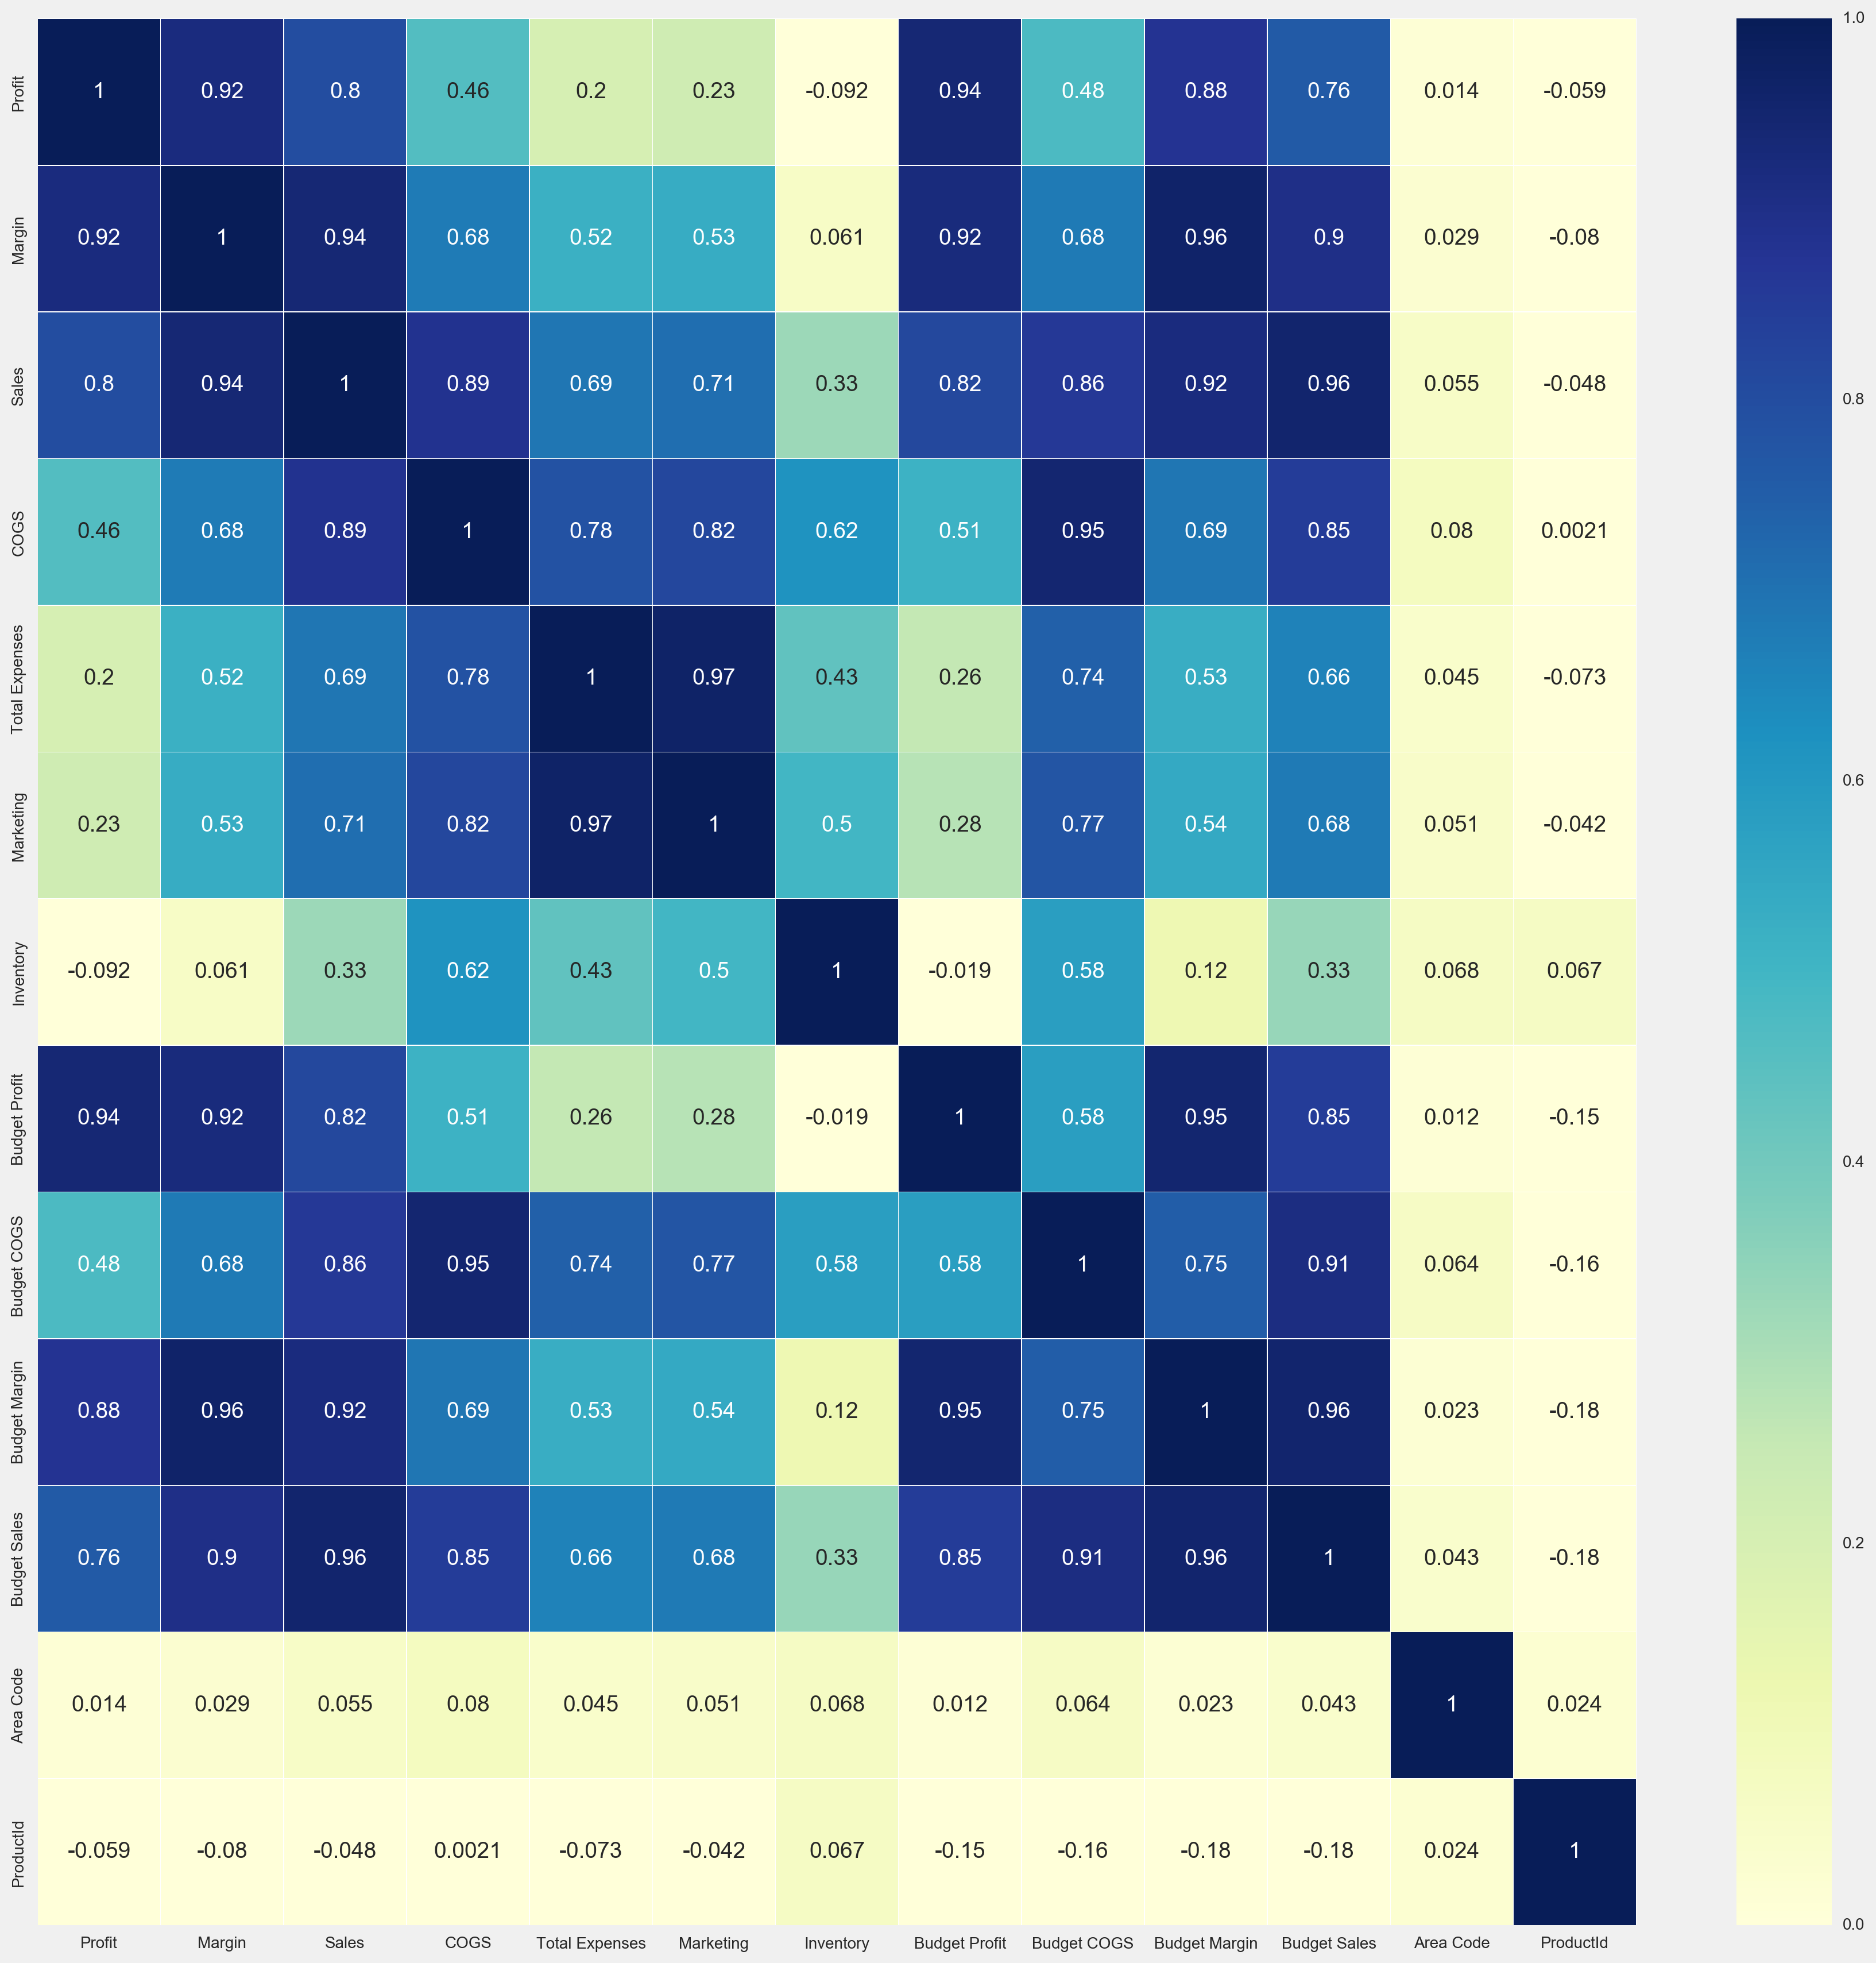

In [144]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
sns.heatmap(coffee_chain.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [145]:
### Most of the variables are positive related to profit,except inventory.

In [146]:
## rename variables
coffee_chain.rename(columns={
    'Total Expenses':'Total_Expenses',
    'Budget Profit':'Budget_Profit',
    'Budget COGS':'Budget_COGS',
    'Budget Margin':'Budget_Margin',
    'Budget Sales':'Budget_Sales',
    'Area Code':'Area_Code',
   
    },inplace=True)

In [147]:
coffee_chain.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total_Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget_Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget_COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0
Budget_Margin,4248.0,100.819209,92.602725,-210.0,50.00,70.0,130.0,690.0


---
##Data Visualizing
---

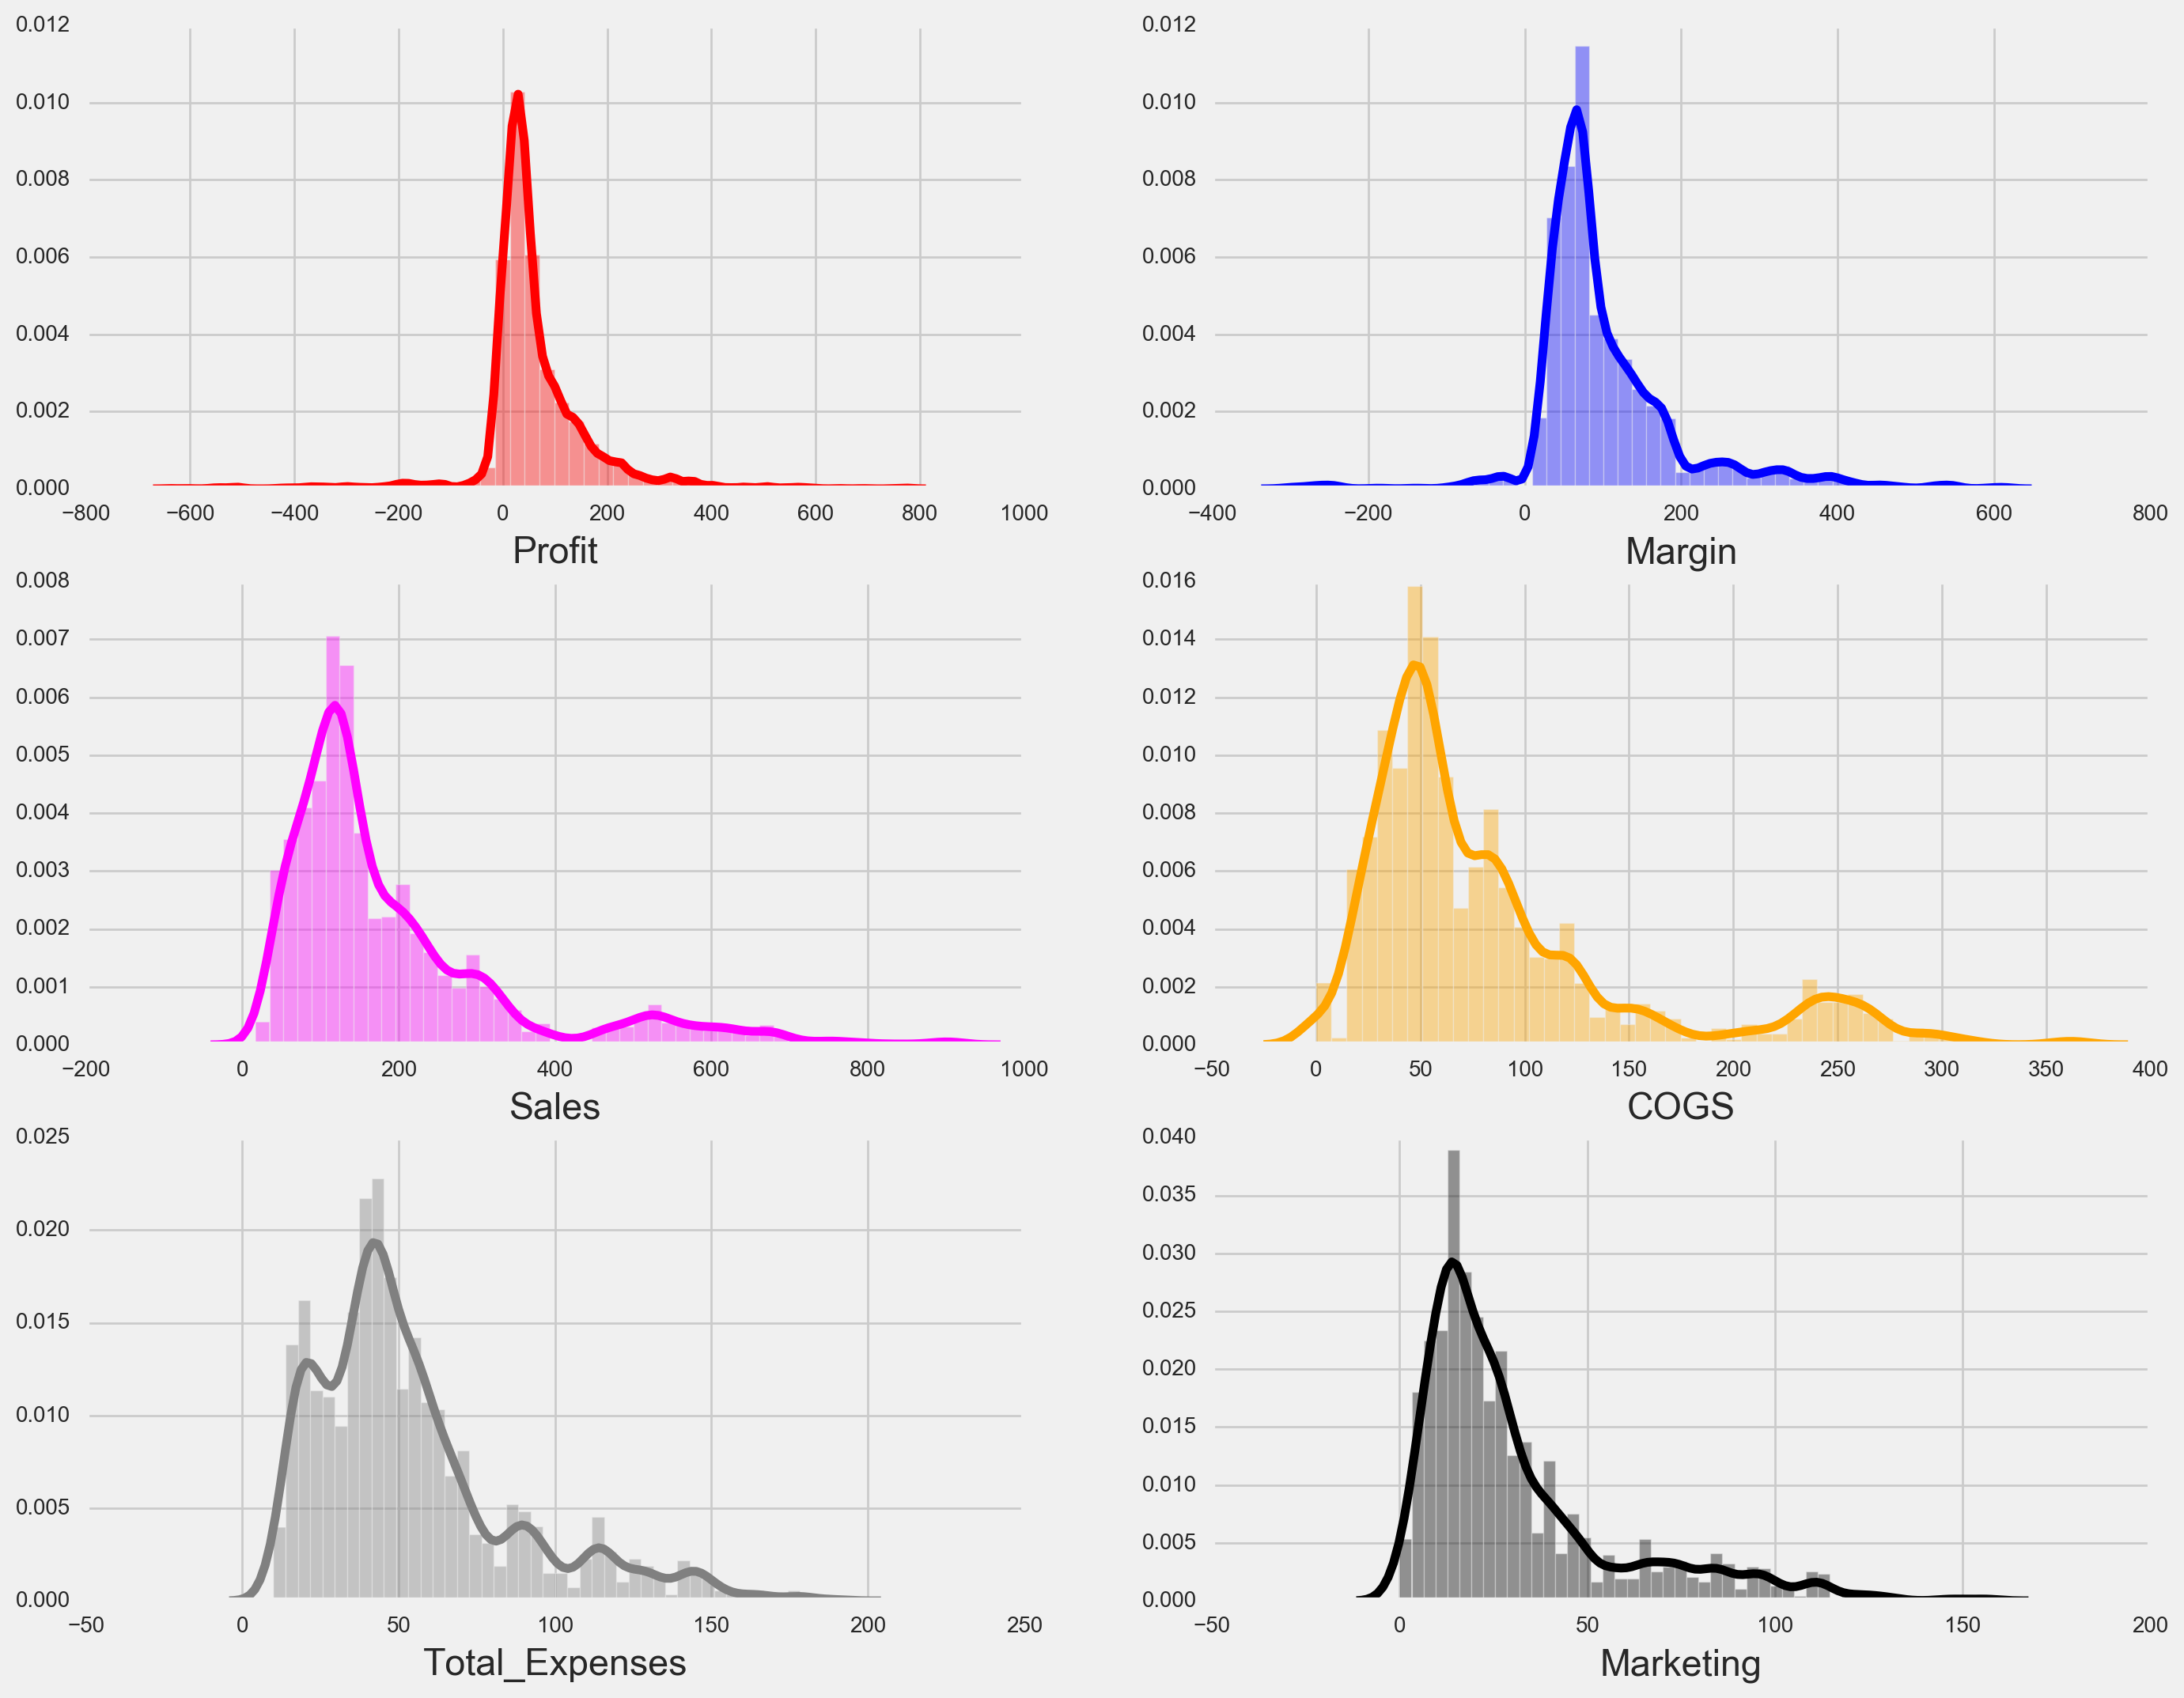

In [148]:
fig, axarr = plt.subplots(3, 2, figsize=(15,12),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(coffee_chain.Profit, ax=axarr[0,0], color='red')

axarr[0,1] = sns.distplot(coffee_chain.Margin,ax=axarr[0,1], color='blue')       
                          
axarr[1,0] = sns.distplot(coffee_chain.Sales, ax=axarr[1,0], color='magenta')

axarr[1,1] = sns.distplot(coffee_chain.COGS, ax=axarr[1,1], color='orange')

axarr[2,0] = sns.distplot(coffee_chain.Total_Expenses, ax=axarr[2,0], color='grey')

axarr[2,1] = sns.distplot(coffee_chain.Marketing, ax=axarr[2,1], color='black')

plt.show()

The distribution result shows that all the variables have a command distribution pattern:skew to the left. And the Profit distribution results shows there are some negative profit value.

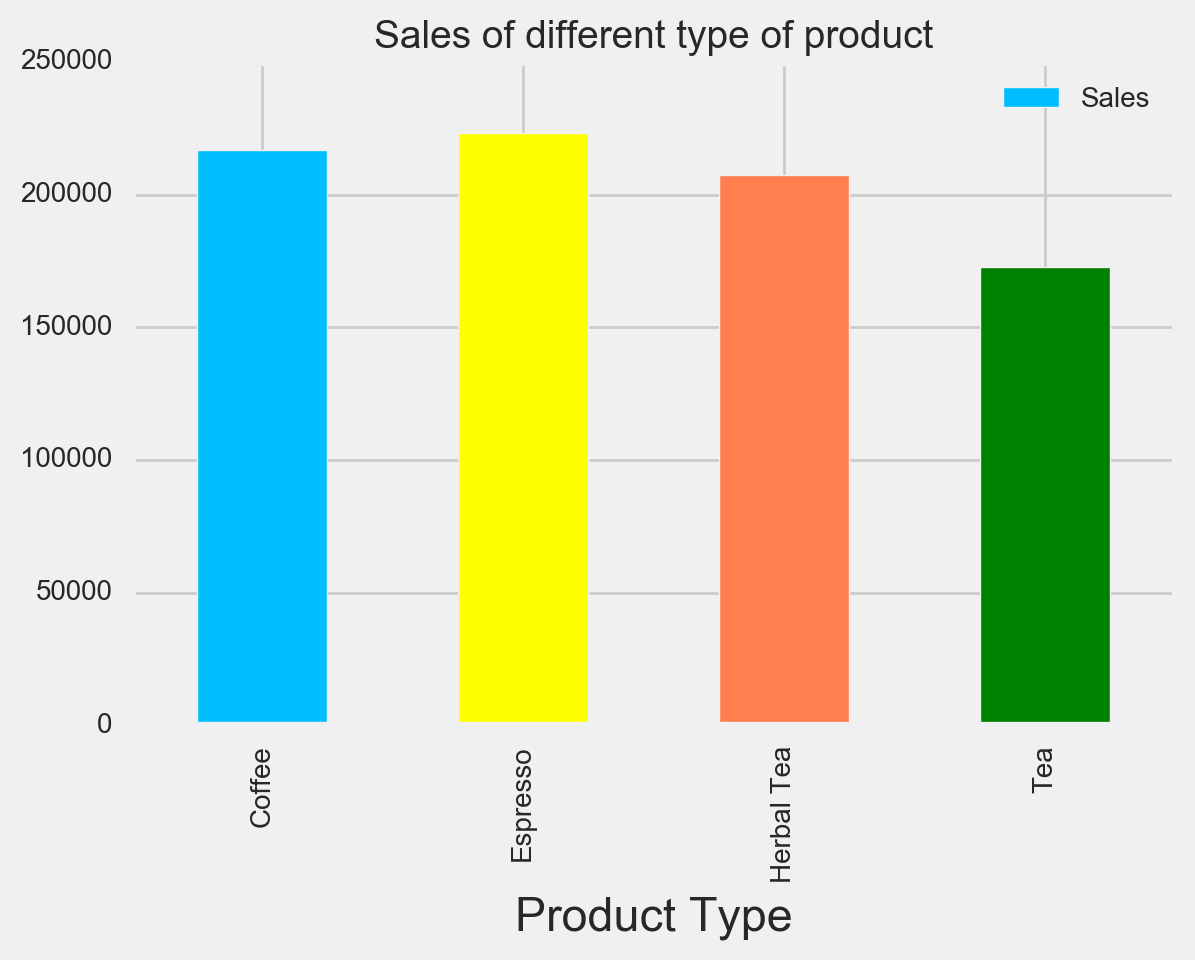

In [149]:
coffee_chain.groupby( ['Product Type'] )[ ['Sales'] ].sum().plot(kind="bar",
                                                                           color=['deepskyblue', 'yellow','coral','green']
                                                                         )
plt.title('Sales of different type of product', fontsize=14)
plt.show()

In [150]:
### Top sale is Espresso,and worse sale is tea. And groupby Product to find out the details of each type of product.


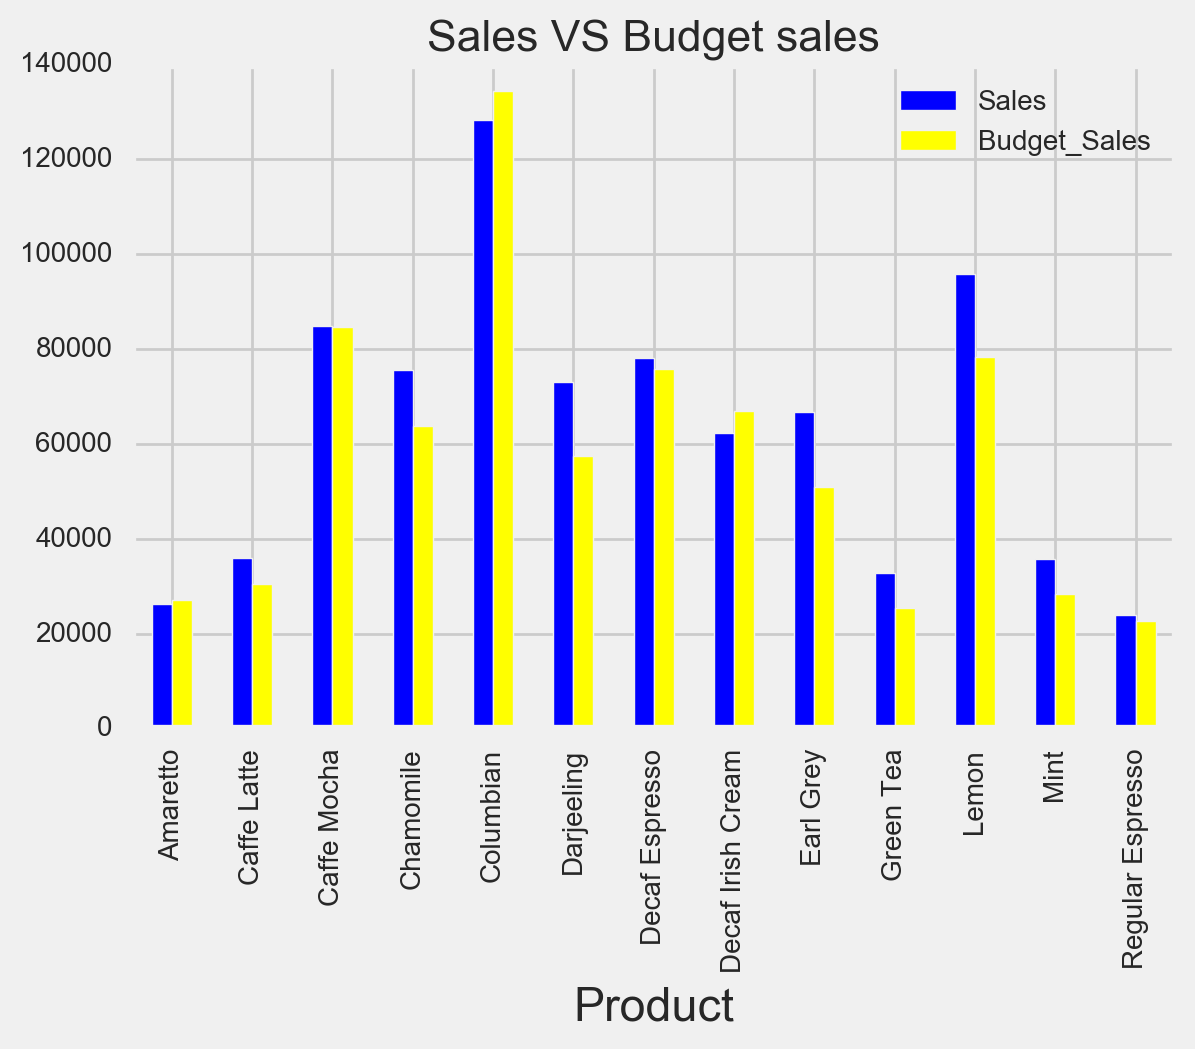

In [151]:
coffee_chain.groupby( ['Product'] )[ ['Sales','Budget_Sales'] ].sum().plot(kind="bar",
                                                                           color=['blue', 'yellow']
                                                                         )
plt.title('Sales VS Budget sales', fontsize=16)
plt.show()

In [152]:
### First of all, Tea category
coffee_chain_tea = coffee_chain['Product Type'] == 'Tea'
coffee_chain_1=coffee_chain[coffee_chain_tea]
coffee_chain_1

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,Area_Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
672,17,72,130,58,55,22,338,20,40,70,110,719,11,2010-01-01,Colorado,Central,Major Market,Tea,Darjeeling,Regular
673,18,73,132,59,55,22,331,10,50,60,110,719,11,2010-01-02,Colorado,Central,Major Market,Tea,Darjeeling,Regular
674,11,64,115,51,53,19,396,20,40,60,100,719,11,2010-01-06,Colorado,Central,Major Market,Tea,Darjeeling,Regular
675,15,69,124,55,54,20,410,20,40,60,100,719,11,2010-01-11,Colorado,Central,Major Market,Tea,Darjeeling,Regular
676,26,72,145,58,58,22,338,20,40,70,110,719,11,2011-01-01,Colorado,Central,Major Market,Tea,Darjeeling,Regular
677,17,64,114,51,48,19,419,20,40,60,100,719,11,2011-01-07,Colorado,Central,Major Market,Tea,Darjeeling,Regular
678,10,57,109,45,50,17,409,10,30,50,80,719,11,2011-01-09,Colorado,Central,Major Market,Tea,Darjeeling,Regular
679,22,69,132,55,54,20,410,20,40,60,100,719,11,2011-01-11,Colorado,Central,Major Market,Tea,Darjeeling,Regular
680,-10,53,90,37,63,34,261,0,20,40,60,435,11,2010-01-01,Utah,West,Small Market,Tea,Darjeeling,Regular
681,-7,61,104,43,68,39,256,10,20,50,70,435,11,2010-01-02,Utah,West,Small Market,Tea,Darjeeling,Regular


In [153]:
### Translate string variables to numeric
coffee_chain_1['Profit']=pd.to_numeric(coffee_chain_1['Profit'])

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



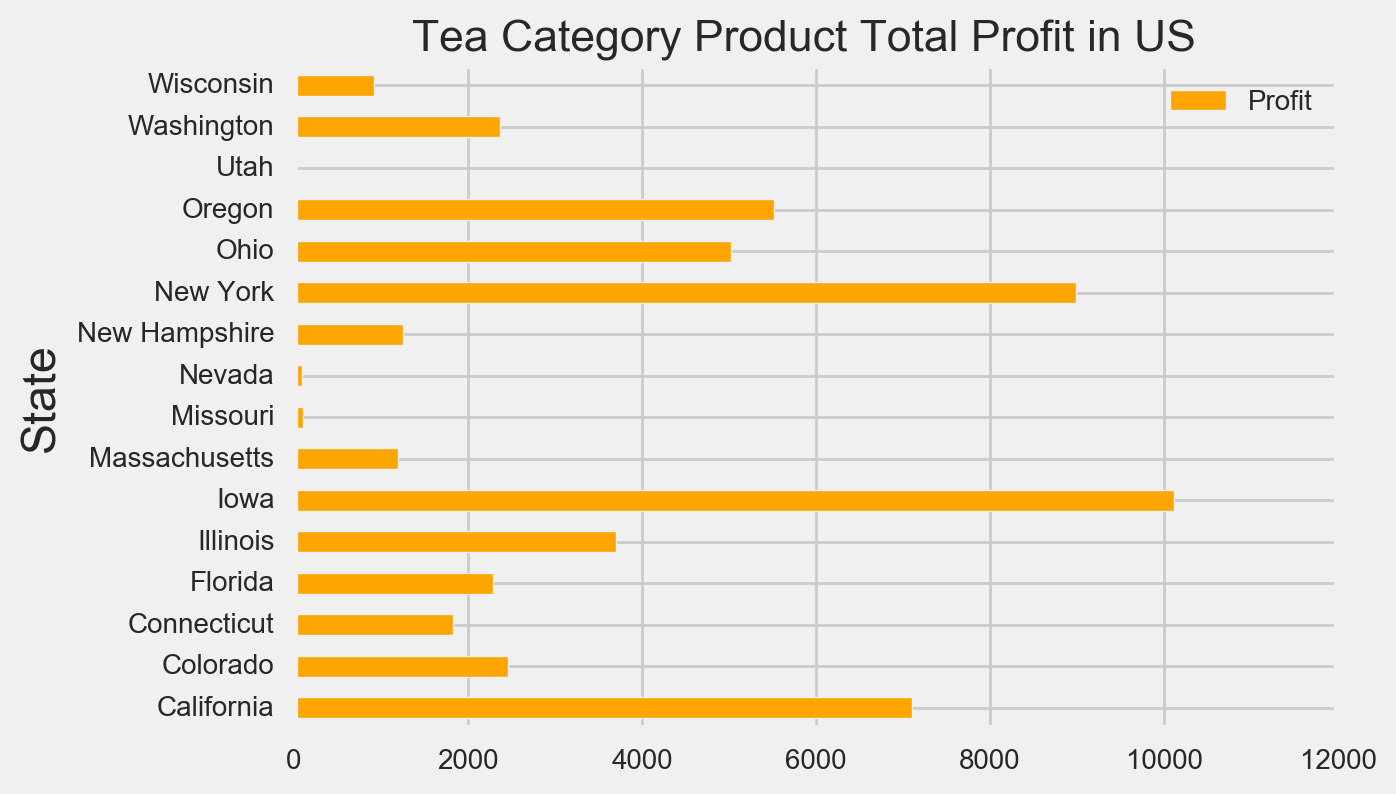

In [154]:
fig = plt.figure(figsize=(20,20))
coffee_chain_1.groupby( ['State'] )[ ['Profit'] ].sum().plot(kind="barh", color='orange')
plt.title('Tea Category Product Total Profit in US  ', fontsize=16)
plt.show()

In [155]:
### group the profit by states, and sort the column in a ascending sequence
profit_state=coffee_chain_1.groupby(['State']).sum()['Profit'].reset_index()
print profit_state.sort(['Profit'],ascending=True)

            State  Profit
13           Utah       3
8          Nevada      98
7        Missouri     109
15      Wisconsin     917
6   Massachusetts    1199
9   New Hampshire    1256
2     Connecticut    1832
3         Florida    2287
14     Washington    2367
1        Colorado    2464
4        Illinois    3700
11           Ohio    5029
12         Oregon    5523
0      California    7107
10       New York    8984
5            Iowa   10111


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [156]:
### Utah's total profit just 3, which means tea products are" troubled product" in Utah, the firm needs to pay attention and have some stretegy to solve this problem. 

In [157]:
### Secondly, Herbal Tea category
coffee_chain_herbal_tea = coffee_chain['Product Type'] == 'Herbal Tea'
coffee_chain_2=coffee_chain[coffee_chain_herbal_tea]
coffee_chain_2

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,Area_Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
192,0,87,150,63,87,57,435,20,50,80,130,719,9,2010-01-01,Colorado,Central,Major Market,Herbal Tea,Lemon,Decaf
193,-4,73,125,52,77,47,433,20,40,70,110,719,9,2010-01-04,Colorado,Central,Major Market,Herbal Tea,Lemon,Decaf
194,-14,52,88,37,58,33,513,0,30,40,70,719,9,2011-01-08,Colorado,Central,Major Market,Herbal Tea,Lemon,Decaf
195,-9,65,119,47,71,42,521,0,40,60,100,719,9,2011-01-12,Colorado,Central,Major Market,Herbal Tea,Lemon,Decaf
196,10,111,190,79,101,72,551,30,70,110,180,580,9,2010-01-01,Oklahoma,South,Small Market,Herbal Tea,Lemon,Decaf
197,25,154,264,110,129,100,665,40,100,150,250,580,9,2010-01-06,Oklahoma,South,Small Market,Herbal Tea,Lemon,Decaf
198,34,184,317,133,150,120,705,60,120,190,310,580,9,2010-01-08,Oklahoma,South,Small Market,Herbal Tea,Lemon,Decaf
199,16,130,223,93,114,84,692,40,80,130,210,580,9,2010-01-09,Oklahoma,South,Small Market,Herbal Tea,Lemon,Decaf
200,15,130,224,94,115,85,694,20,80,120,200,580,9,2010-01-11,Oklahoma,South,Small Market,Herbal Tea,Lemon,Decaf
201,20,145,250,105,125,95,716,30,90,140,230,580,9,2010-01-12,Oklahoma,South,Small Market,Herbal Tea,Lemon,Decaf


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



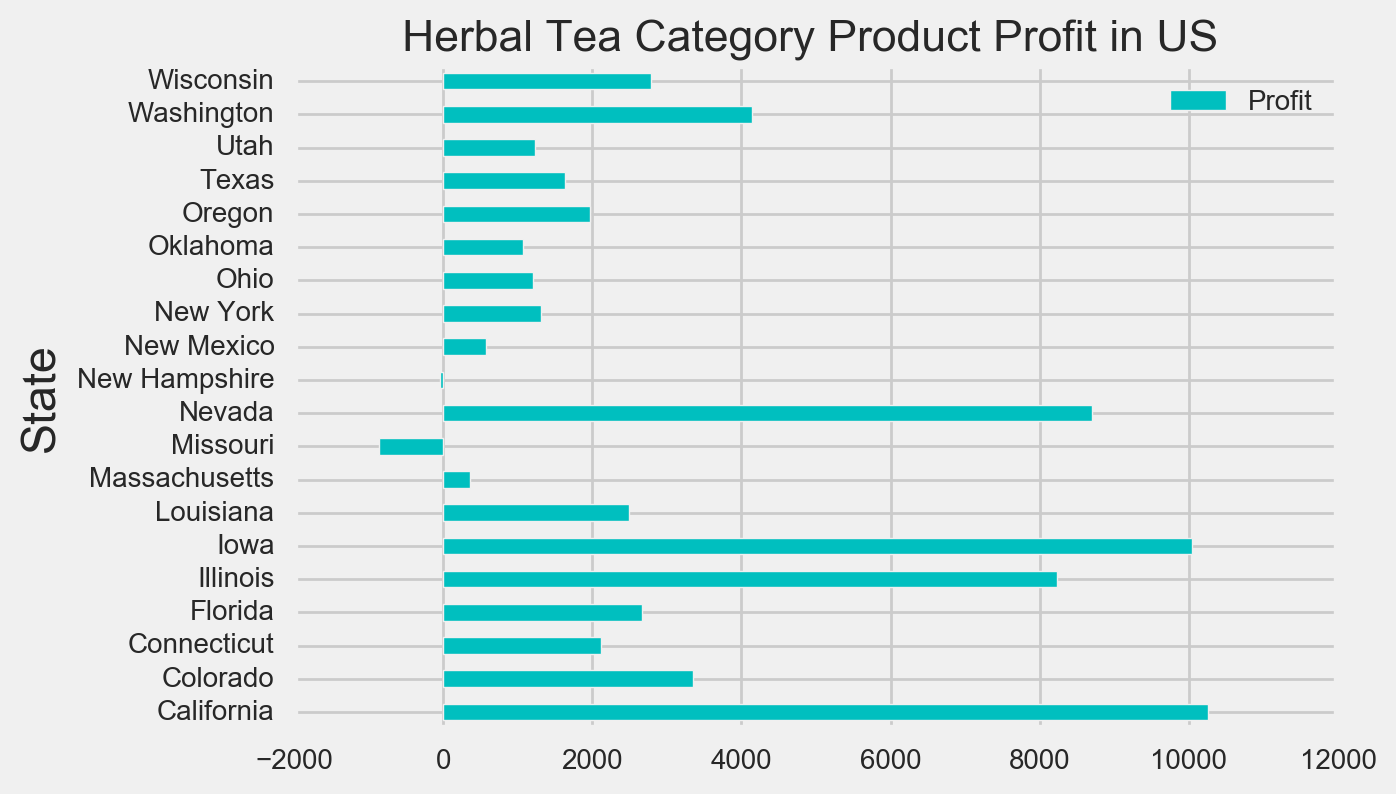

In [158]:
coffee_chain_2['Profit']=pd.to_numeric(coffee_chain_2['Profit'])
fig = plt.figure(figsize=(20,20))
coffee_chain_2.groupby( ['State'] )[ ['Profit'] ].sum().plot(kind="barh", color='c')
plt.title('Herbal Tea Category Product Profit in US ', fontsize=16)
plt.show()

In [159]:
### group the profit by states, and sort the column in a ascending sequence
profit_state_2=coffee_chain_2.groupby(['State']).sum()['Profit'].reset_index()
print profit_state_2.sort(['Profit'],ascending=True)

            State  Profit
8        Missouri    -854
10  New Hampshire     -41
7   Massachusetts     366
11     New Mexico     577
14       Oklahoma    1065
13           Ohio    1201
17           Utah    1232
12       New York    1312
16          Texas    1638
15         Oregon    1975
2     Connecticut    2114
6       Louisiana    2491
3         Florida    2672
19      Wisconsin    2788
1        Colorado    3352
18     Washington    4140
4        Illinois    8227
9          Nevada    8699
5            Iowa   10043
0      California   10257


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [160]:
### The total profit of herbal tea category in Missouri and New Mexico are negative.

In [161]:
### Third, Espresso category
coffee_chain_espresso = coffee_chain['Product Type'] == 'Espresso'
coffee_chain_3=coffee_chain[coffee_chain_espresso]
coffee_chain_3

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,Area_Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
1440,84,117,198,81,33,22,441,110,90,140,230,719,5,2010-01-03,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1441,99,136,230,94,37,26,562,140,100,170,270,719,5,2010-01-06,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1442,125,117,211,81,33,22,460,110,90,140,230,719,5,2011-01-04,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1443,145,145,243,100,37,28,598,130,110,170,280,719,5,2011-01-08,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1444,125,118,212,81,34,22,588,110,90,140,230,719,5,2011-01-09,Colorado,Central,Major Market,Espresso,Caffe Mocha,Regular
1445,16,32,53,21,16,5,454,30,10,30,40,580,5,2010-01-04,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1446,13,30,50,20,17,5,482,30,10,30,40,580,5,2010-01-09,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1447,24,44,73,29,20,8,490,20,20,30,50,580,5,2010-01-12,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1448,44,48,90,32,21,8,456,40,20,40,60,580,5,2011-01-01,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular
1449,25,34,60,22,17,6,452,30,10,30,40,580,5,2011-01-02,Oklahoma,South,Small Market,Espresso,Caffe Mocha,Regular


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



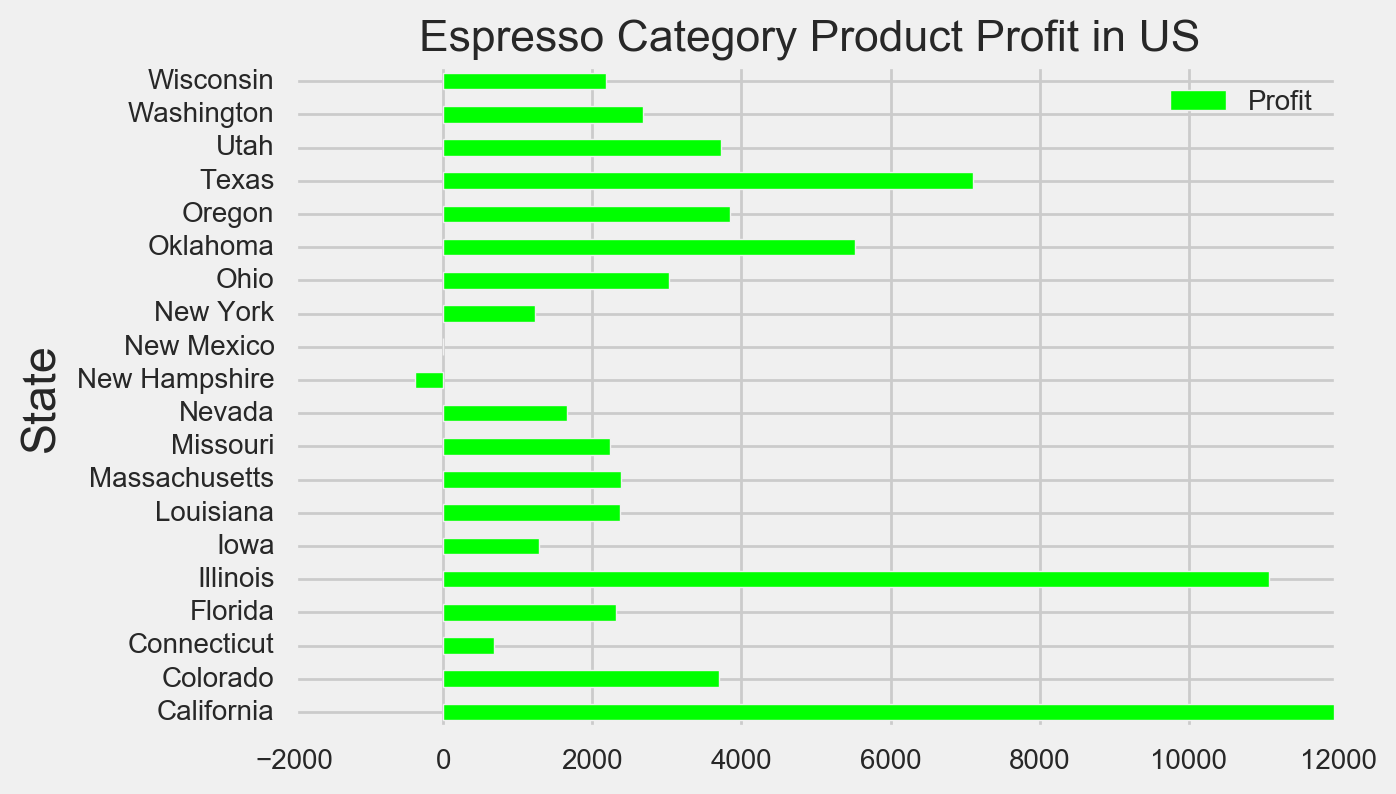

In [162]:
coffee_chain_3['Profit']=pd.to_numeric(coffee_chain_3['Profit'])
fig = plt.figure(figsize=(20,20))
coffee_chain_3.groupby( ['State'] )[ ['Profit'] ].sum().plot(kind="barh", color='lime')
plt.title('Espresso Category Product Profit in US ', fontsize=16)
plt.show()

In [163]:
### group the profit by states, and sort the column in a ascending sequence
profit_state_3=coffee_chain_3.groupby(['State']).sum()['Profit'].reset_index()
print profit_state_3.sort(['Profit'],ascending=True)

            State  Profit
10  New Hampshire    -375
11     New Mexico       2
2     Connecticut     676
12       New York    1235
5            Iowa    1284
9          Nevada    1656
19      Wisconsin    2184
8        Missouri    2236
3         Florida    2320
6       Louisiana    2376
7   Massachusetts    2388
18     Washington    2674
13           Ohio    3027
1        Colorado    3701
17           Utah    3730
15         Oregon    3847
14       Oklahoma    5519
16          Texas    7108
4        Illinois   11069
0      California   11963


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [164]:
### The total profit of espresso category in New Hampshire and New Mexico are negative.

In [165]:
### Coffee category
coffee_chain_coffee = coffee_chain['Product Type'] == 'Coffee'
coffee_chain_4=coffee_chain[coffee_chain_coffee]
coffee_chain_4

,Profit,Margin,Sales,COGS,Total_Expenses,Marketing,Inventory,Budget_Profit,Budget_COGS,Budget_Margin,Budget_Sales,Area_Code,ProductId,Date,State,Market,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,90,130,220,719,1,2010-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
1,121,163,276,113,42,31,897,130,110,170,280,719,1,2010-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
2,134,179,302,123,45,34,959,130,120,170,290,719,1,2010-01-12,Colorado,Central,Major Market,Coffee,Amaretto,Regular
3,146,130,245,89,38,24,777,100,90,130,220,719,1,2011-01-01,Colorado,Central,Major Market,Coffee,Amaretto,Regular
4,167,163,274,113,39,31,897,130,110,170,280,719,1,2011-01-06,Colorado,Central,Major Market,Coffee,Amaretto,Regular
5,197,179,322,123,46,34,915,160,120,180,300,719,1,2011-01-10,Colorado,Central,Major Market,Coffee,Amaretto,Regular
6,190,172,309,118,44,33,930,130,110,170,280,719,1,2011-01-11,Colorado,Central,Major Market,Coffee,Amaretto,Regular
7,46,90,165,75,44,23,956,70,90,110,200,435,1,2010-01-02,Utah,West,Small Market,Coffee,Amaretto,Regular
8,45,89,163,74,44,22,949,70,90,110,200,435,1,2010-01-03,Utah,West,Small Market,Coffee,Amaretto,Regular
9,47,91,167,76,44,23,965,70,90,110,200,435,1,2010-01-04,Utah,West,Small Market,Coffee,Amaretto,Regular


/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



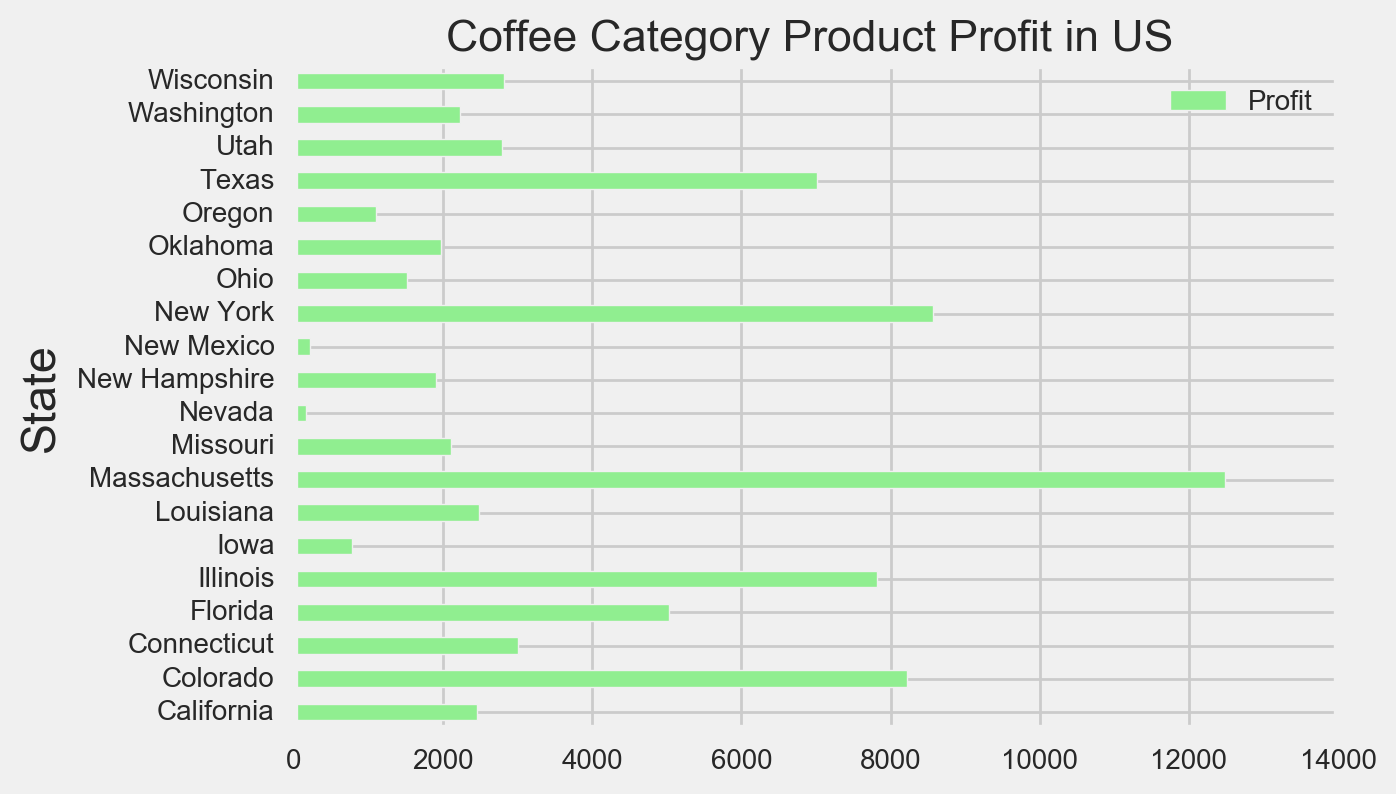

In [166]:
coffee_chain_4['Profit']=pd.to_numeric(coffee_chain_4['Profit'])
fig = plt.figure(figsize=(20,20))
coffee_chain_4.groupby( ['State'] )[ ['Profit'] ].sum().plot(kind="barh", color='lightgreen')
plt.title('Coffee Category Product Profit in US ', fontsize=16)
plt.show()

In [167]:
### Only coffee category does not appear gain loss.

---

Part 2: Machine Learning
---

In [ ]:
### How budget factors impact profit and how to achieve profit maximazation?


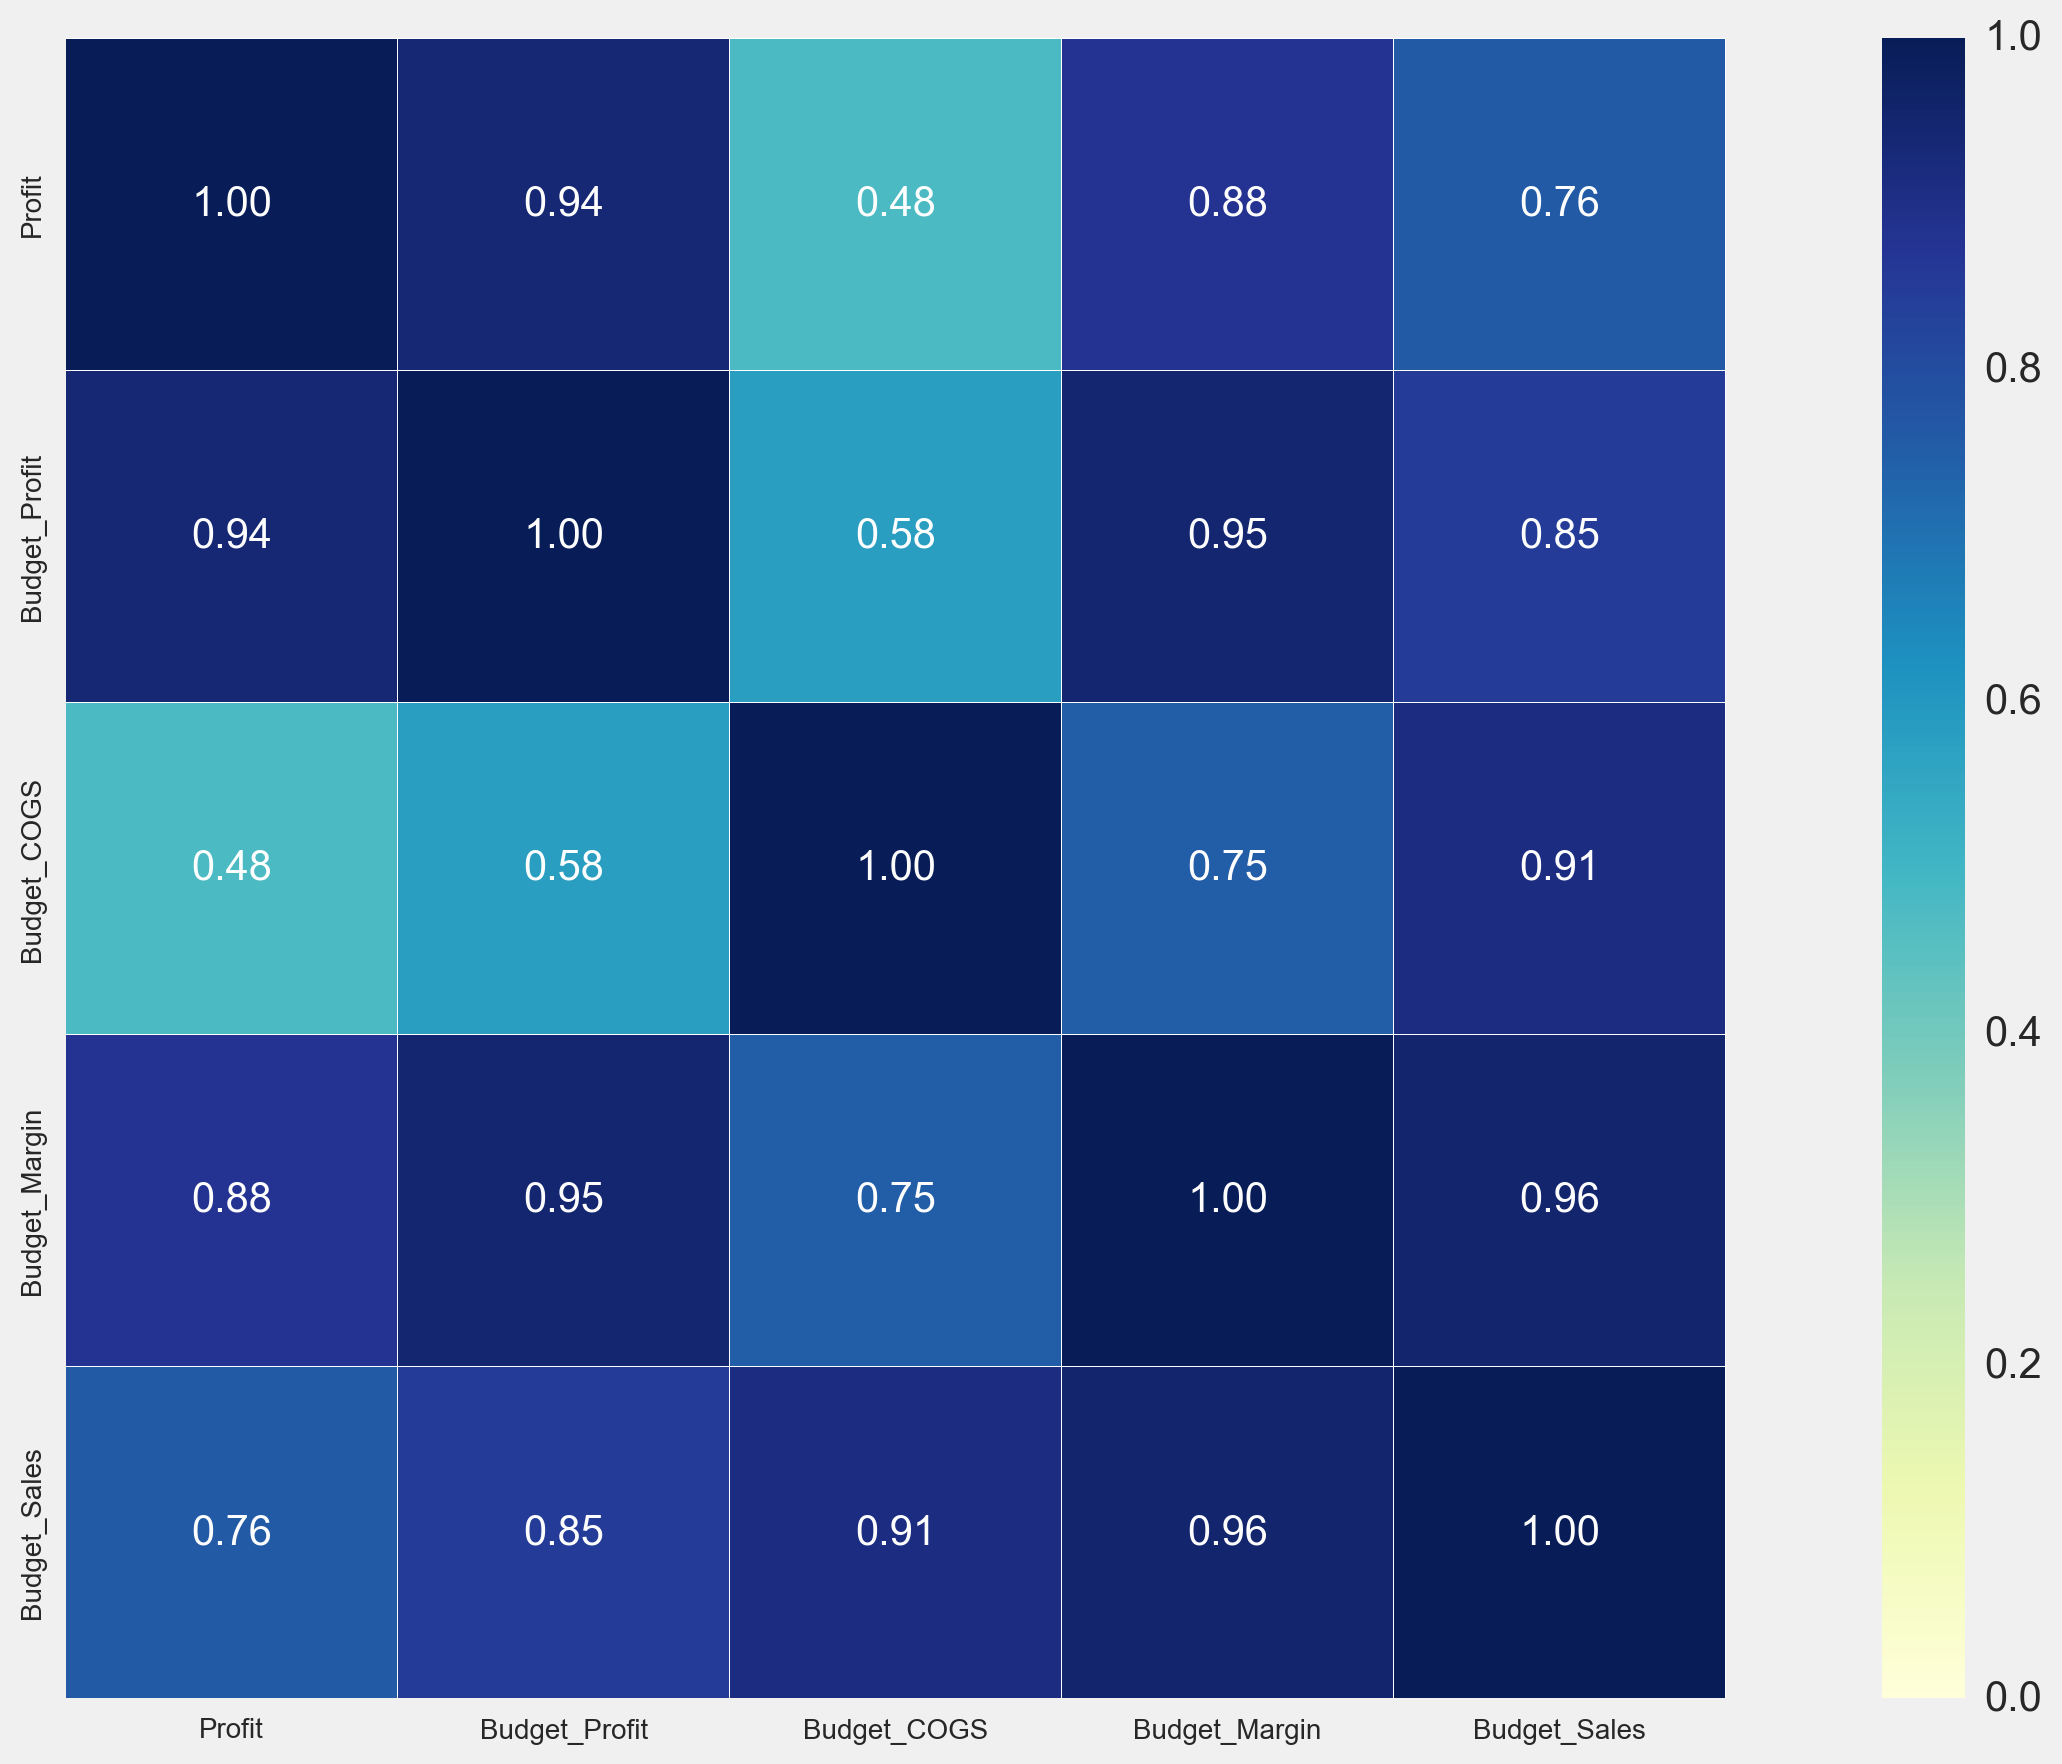

In [169]:
### heatmap for desired variables
cols = ['Profit', 'Budget_Profit', 'Budget_COGS', 'Budget_Margin', 'Budget_Sales']
fig = plt.figure(figsize=(18,10))
ax = fig.gca()

cm = np.corrcoef(coffee_chain[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 cmap="YlGnBu", 
                 vmin=0, 
                 vmax=1,
                 linewidths= .15, 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.show()

Part 2 Machine Learning

---
 
 ### Regularization
---

In [185]:
## Define Y
Y=coffee_chain['Profit']
## Define X
X=coffee_chain[['Budget_Profit','Budget_COGS','Budget_Margin','Budget_Sales']]

In [186]:
##normalization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [187]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, Y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(2973, 4) (1275, 4)


(2973,) (1275,)


In [188]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [196]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

## Cross validate = 10
linreg_scores = cross_val_score(lr, X_train, y_train, cv=10)
ytrain_pred = lr.predict(X_train)
ytest_pred = lr.predict(X_test)

## Print the R^2
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 0.92022408  0.88666054  0.87389806  0.89879031  0.91315203  0.87762186
  0.89275766  0.89667983  0.86952747  0.87241661]
Average R^2 OLS score: 0.890
